In [23]:
import pandas as pd

In [30]:
from elasticsearch import Elasticsearch
import json


es = Elasticsearch(timeout=5000)

if __name__ == "__main__":

    page = es.search(index='jaeger-span-2022-05-19', scroll='10m', size=10000, body={"query": {
      "match": {
             "kind":"SERVER"
                 }
          },
      "query":{
        "bool": {
          "must": [{
            "script": {
              "script": {
                "inline": "doc['traceID.keyword'].value == doc['spanID.keyword'].value"
            
                      }
                    } 
                  }]
                }
              }})

    query_request = []

    sid = page['_scroll_id']
    print(page['hits']['total']['value'])

    while(int(page['hits']['total']['value']) > 0):
        print("Scrolling...", str(int(page['hits']['total']['value'])))
        query_request.append(page['hits']['hits'])
        page = es.scroll(scroll_id=sid, scroll='10m')
        page['hits']['total']['value'] = len(page['hits']['hits'])


    print(len(query_request))

    result = []

    for i in query_request:
        for j in i:
            result.append(j['_source'])

    print(len(result))

45457
Scrolling... 45457
Scrolling... 10000
Scrolling... 10000
Scrolling... 10000
Scrolling... 5457
5
45457


In [131]:
df= pd.DataFrame(result)
df

,traceID,traceId,process,references,startTimeMillis,kind,flags,operationName,tags,spanID,duration,experiment,name,startTime,id,logs,timestamp
0,28803e3bea71ce9b,28803e3bea71ce9b,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979490752,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",28803e3bea71ce9b,498851,3,ts-auth-service_getToken,1652979490752000,28803e3bea71ce9b,"[{'fields': [{'type': 'string', 'value': 'User...",1652979490752000
1,f71c27ad8b69154b,f71c27ad8b69154b,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979491344,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",f71c27ad8b69154b,121710,9,ts-auth-service_getToken,1652979491344000,f71c27ad8b69154b,"[{'fields': [{'type': 'string', 'value': 'User...",1652979491344000
2,f9af38af5c40b149,f9af38af5c40b149,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979492347,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",f9af38af5c40b149,116436,3,ts-auth-service_getToken,1652979492347000,f9af38af5c40b149,"[{'fields': [{'type': 'string', 'value': 'User...",1652979492347000
3,1fc683eba00e56fb,1fc683eba00e56fb,"{'serviceName': 'ts-travel-plan-service', 'tag...",[],1652979494193,SERVER,1,getByCheapest,"[{'type': 'int64', 'value': '200', 'key': 'htt...",1fc683eba00e56fb,250623,8,ts-travel-plan-service_getByCheapest,1652979494193000,1fc683eba00e56fb,"[{'fields': [{'type': 'string', 'value': 'Trav...",1652979494193000
4,ac1ce7bff44eb64e,ac1ce7bff44eb64e,"{'serviceName': 'ts-travel-plan-service', 'tag...",[],1652979493349,SERVER,1,getByCheapest,"[{'type': 'int64', 'value': '200', 'key': 'htt...",ac1ce7bff44eb64e,837771,7,ts-travel-plan-service_getByCheapest,1652979493349000,ac1ce7bff44eb64e,"[{'fields': [{'type': 'string', 'value': 'Trav...",1652979493349000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45452,61b8f54c89de4f6a,61b8f54c89de4f6a,"{'serviceName': 'ts-food-service', 'tags': [{'...",[],1652983129436,SERVER,1,getAllFood,"[{'type': 'int64', 'value': '200', 'key': 'htt...",61b8f54c89de4f6a,25792,1,ts-food-service_getAllFood,1652983129436000,61b8f54c89de4f6a,"[{'fields': [{'type': 'string', 'value': 'Food...",1652983129436000
45453,3a27dc4dd5efa762,3a27dc4dd5efa762,"{'serviceName': 'ts-food-service', 'tags': [{'...",[],1652983129736,SERVER,1,getAllFood,"[{'type': 'int64', 'value': '200', 'key': 'htt...",3a27dc4dd5efa762,20820,2,ts-food-service_getAllFood,1652983129736000,3a27dc4dd5efa762,"[{'fields': [{'type': 'string', 'value': 'Food...",1652983129736000
45454,18df1292fddd3377,18df1292fddd3377,"{'serviceName': 'ts-assurance-service', 'tags'...",[],1652983129730,SERVER,1,getAllAssuranceType,"[{'type': 'int64', 'value': '200', 'key': 'htt...",18df1292fddd3377,1748,2,ts-assurance-service_getAllAssuranceType,1652983129730000,18df1292fddd3377,"[{'fields': [{'type': 'string', 'value': 'Assu...",1652983129730000
45455,2aaca807b36b4b42,2aaca807b36b4b42,"{'serviceName': 'ts-travel-service', 'tags': [...",[],1652983129693,SERVER,1,queryInfo,"[{'type': 'int64', 'value': '200', 'key': 'htt...",2aaca807b36b4b42,29062,5,ts-travel-service_queryInfo,1652983129693000,2aaca807b36b4b42,"[{'fields': [{'type': 'string', 'value': 'Trav...",1652983129693000


In [132]:
#df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
#df
#d=datetime.utcfromtimestamp(1652983130532000/1000000)
#print(d)

In [133]:
for i in df['timestamp'].index:
    df.loc[i,'timestamp'] = datetime.utcfromtimestamp(df.loc[i,'timestamp']/1000000)
df    

,traceID,traceId,process,references,startTimeMillis,kind,flags,operationName,tags,spanID,duration,experiment,name,startTime,id,logs,timestamp
0,28803e3bea71ce9b,28803e3bea71ce9b,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979490752,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",28803e3bea71ce9b,498851,3,ts-auth-service_getToken,1652979490752000,28803e3bea71ce9b,"[{'fields': [{'type': 'string', 'value': 'User...",2022-05-19 16:58:10.752000
1,f71c27ad8b69154b,f71c27ad8b69154b,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979491344,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",f71c27ad8b69154b,121710,9,ts-auth-service_getToken,1652979491344000,f71c27ad8b69154b,"[{'fields': [{'type': 'string', 'value': 'User...",2022-05-19 16:58:11.344000
2,f9af38af5c40b149,f9af38af5c40b149,"{'serviceName': 'ts-auth-service', 'tags': [{'...",[],1652979492347,SERVER,1,getToken,"[{'type': 'int64', 'value': '200', 'key': 'htt...",f9af38af5c40b149,116436,3,ts-auth-service_getToken,1652979492347000,f9af38af5c40b149,"[{'fields': [{'type': 'string', 'value': 'User...",2022-05-19 16:58:12.347000
3,1fc683eba00e56fb,1fc683eba00e56fb,"{'serviceName': 'ts-travel-plan-service', 'tag...",[],1652979494193,SERVER,1,getByCheapest,"[{'type': 'int64', 'value': '200', 'key': 'htt...",1fc683eba00e56fb,250623,8,ts-travel-plan-service_getByCheapest,1652979494193000,1fc683eba00e56fb,"[{'fields': [{'type': 'string', 'value': 'Trav...",2022-05-19 16:58:14.193000
4,ac1ce7bff44eb64e,ac1ce7bff44eb64e,"{'serviceName': 'ts-travel-plan-service', 'tag...",[],1652979493349,SERVER,1,getByCheapest,"[{'type': 'int64', 'value': '200', 'key': 'htt...",ac1ce7bff44eb64e,837771,7,ts-travel-plan-service_getByCheapest,1652979493349000,ac1ce7bff44eb64e,"[{'fields': [{'type': 'string', 'value': 'Trav...",2022-05-19 16:58:13.349000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45452,61b8f54c89de4f6a,61b8f54c89de4f6a,"{'serviceName': 'ts-food-service', 'tags': [{'...",[],1652983129436,SERVER,1,getAllFood,"[{'type': 'int64', 'value': '200', 'key': 'htt...",61b8f54c89de4f6a,25792,1,ts-food-service_getAllFood,1652983129436000,61b8f54c89de4f6a,"[{'fields': [{'type': 'string', 'value': 'Food...",2022-05-19 17:58:49.436000
45453,3a27dc4dd5efa762,3a27dc4dd5efa762,"{'serviceName': 'ts-food-service', 'tags': [{'...",[],1652983129736,SERVER,1,getAllFood,"[{'type': 'int64', 'value': '200', 'key': 'htt...",3a27dc4dd5efa762,20820,2,ts-food-service_getAllFood,1652983129736000,3a27dc4dd5efa762,"[{'fields': [{'type': 'string', 'value': 'Food...",2022-05-19 17:58:49.736000
45454,18df1292fddd3377,18df1292fddd3377,"{'serviceName': 'ts-assurance-service', 'tags'...",[],1652983129730,SERVER,1,getAllAssuranceType,"[{'type': 'int64', 'value': '200', 'key': 'htt...",18df1292fddd3377,1748,2,ts-assurance-service_getAllAssuranceType,1652983129730000,18df1292fddd3377,"[{'fields': [{'type': 'string', 'value': 'Assu...",2022-05-19 17:58:49.730000
45455,2aaca807b36b4b42,2aaca807b36b4b42,"{'serviceName': 'ts-travel-service', 'tags': [...",[],1652983129693,SERVER,1,queryInfo,"[{'type': 'int64', 'value': '200', 'key': 'htt...",2aaca807b36b4b42,29062,5,ts-travel-service_queryInfo,1652983129693000,2aaca807b36b4b42,"[{'fields': [{'type': 'string', 'value': 'Trav...",2022-05-19 17:58:49.693000


In [136]:
from datetime import datetime
timestamp1 = 1652979531
timestamp2 = 1652983145
start = datetime.fromtimestamp(timestamp1)
end = datetime.fromtimestamp(timestamp2)
print(start,end)

2022-05-19 18:58:51 2022-05-19 19:59:05


In [138]:
mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
45452    False
45453    False
45454    False
45455    False
45456    False
Name: timestamp, Length: 45457, dtype: bool

In [139]:
filtered_df=df.loc[mask]
print(filtered_df)

Empty DataFrame
Columns: [traceID, traceId, process, references, startTimeMillis, kind, flags, operationName, tags, spanID, duration, experiment, name, startTime, id, logs, timestamp]
Index: []


/Users/jessicaleone/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:412: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


Text(0.01, 0.01, '')

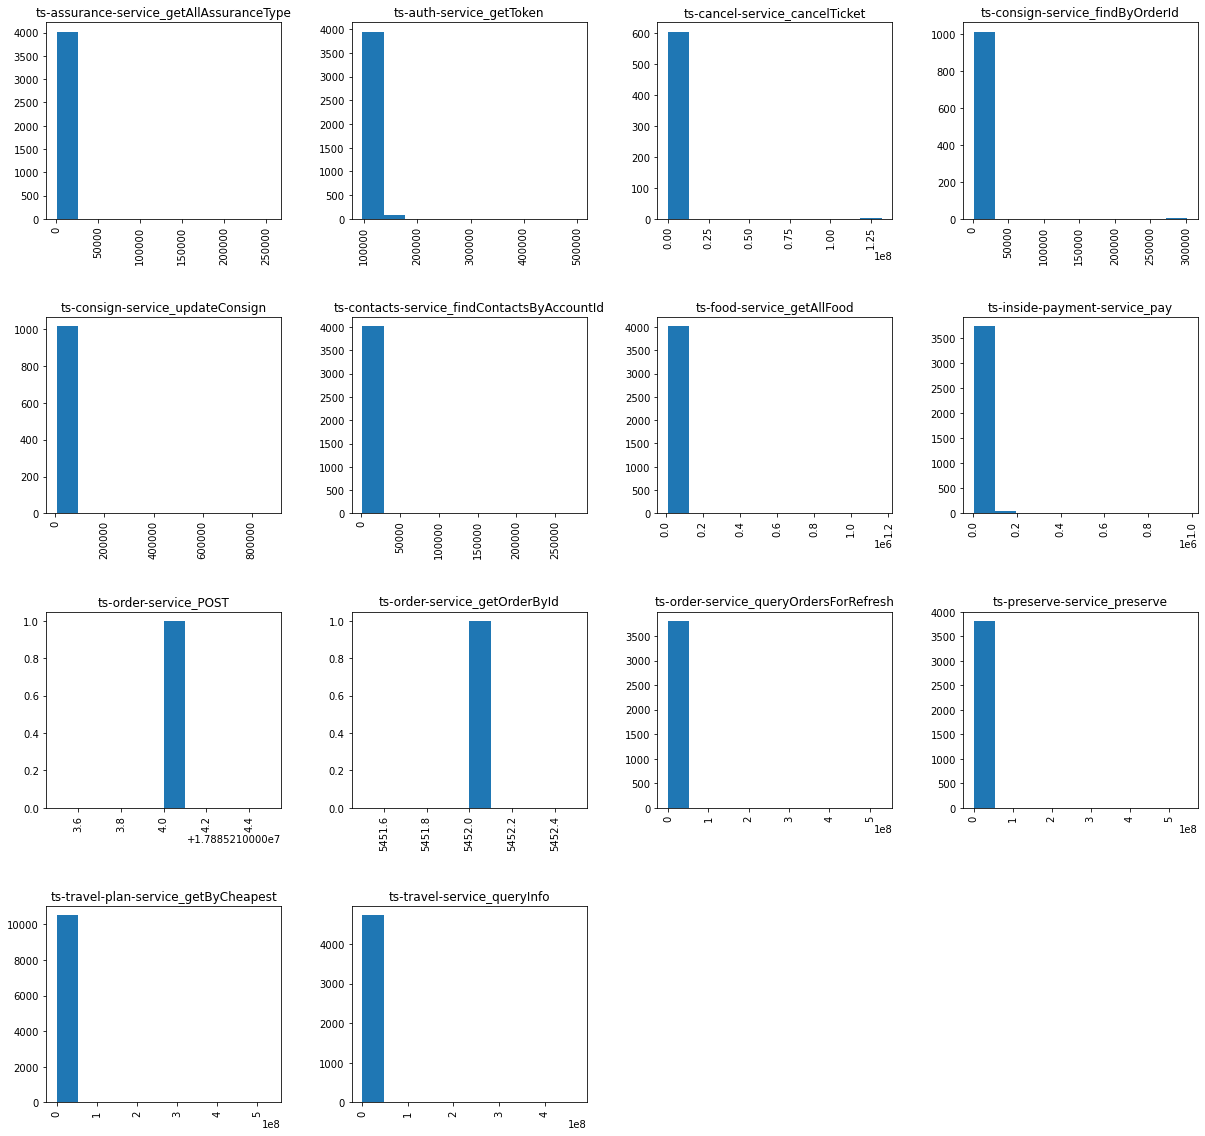

In [142]:
import matplotlib.pyplot as plt
# set up figure & axes
fig, axes = plt.subplots(figsize=(20,20))

# drop sharex, sharey, layout & add ax=axes
df.hist(column='duration',by='name', ax=axes)

# set title and axis labels
fig.text(0.01, 0.01, '')
fig.text(0.01, 0.01, '', rotation='vertical')